<a href="https://colab.research.google.com/github/miraculusik/tensorflow-deep-learning-practices/blob/main/transfer_learning_exercises_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠  Exercises

**Q1 :**Use feature-extraction to train a transfer learning model on 10% of the Food Vision data for 10 epochs using tf.keras.applications.EfficientNetB0 as the base model. Use the ModelCheckpoint callback to save the weights to file.

**Q2 :**Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

**Q3 :**Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

**Q4 :**Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [125]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-08-11 15:53:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   293MB/s    in 0.5s    

2021-08-11 15:53:41 (293 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [126]:
import os

for root, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} files in  '{root}'")

There are 2 directories and 0 files in  '10_food_classes_10_percent'
There are 10 directories and 0 files in  '10_food_classes_10_percent/train'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/pizza'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/sushi'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/chicken_curry'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/steak'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/ice_cream'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/ramen'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/hamburger'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/fried_rice'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/chicken_wings'
There are 0 directories and 75 files in  '10_food_classes_10_percent/train/grilled_salmo

In [127]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def plot_image(target_dir, class_name):

  target_folder = target_dir + class_name
  img_ = random.sample(os.listdir(target_folder), 1)[0]
  img = mpimg.imread(target_folder + "/" + img_)

  plt.imshow(img)
  plt.axis(False)
  plt.title(class_name + "\nimg shape: " + str(img.shape))

  return img

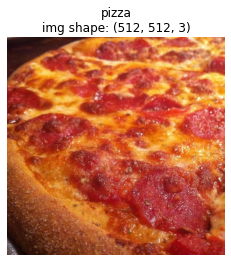

In [128]:
img = plot_image(target_dir="10_food_classes_10_percent/train/",
                class_name= "pizza")

In [129]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir =  "10_food_classes_10_percent/train"
test_dir =  "10_food_classes_10_percent/test"

train_data = image_dataset_from_directory(train_dir,
                                          label_mode= "categorical",
                                          image_size= IMAGE_SIZE,
                                          batch_size= BATCH_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         label_mode= "categorical",
                                         image_size= IMAGE_SIZE,
                                         batch_size= BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [130]:
class_names = train_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [131]:
import tensorflow as tf

check_path = "models_checkpoint_weights/model_q2/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= check_path,
                                                         save_freq= "epoch",
                                                         save_weights_only= True,
                                                         save_best_only= False,
                                                         verbose=1)

In [132]:
#base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

#create model
inputs = tf.keras.layers.Input(shape=IMAGE_SIZE+(3,), name="input_layer")

x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_q2 = tf.keras.Model(inputs, outputs)

#compile model
model_q2.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#fit model
history_q2 = model_q2.fit(train_data,
                          epochs=10,
                          steps_per_epoch= len(train_data),
                          validation_data= test_data,
                          validation_steps= int(0.25*len(test_data)),
                          callbacks=[checkpoint_callback])

Epoch 1/10
24/24 [==============================] - 11s 262ms/step - loss: 1.8264 - accuracy: 0.4427 - val_loss: 1.2906 - val_accuracy: 0.6891

Epoch 00001: saving model to models_checkpoint_weights/model_q2/checkpoint.ckpt
Epoch 2/10
24/24 [==============================] - 5s 206ms/step - loss: 1.1032 - accuracy: 0.7467 - val_loss: 0.9210 - val_accuracy: 0.7714

Epoch 00002: saving model to models_checkpoint_weights/model_q2/checkpoint.ckpt
Epoch 3/10
24/24 [==============================] - 5s 209ms/step - loss: 0.8065 - accuracy: 0.8200 - val_loss: 0.7452 - val_accuracy: 0.8092

Epoch 00003: saving model to models_checkpoint_weights/model_q2/checkpoint.ckpt
Epoch 4/10
24/24 [==============================] - 5s 203ms/step - loss: 0.6646 - accuracy: 0.8467 - val_loss: 0.6522 - val_accuracy: 0.8207

Epoch 00004: saving model to models_checkpoint_weights/model_q2/checkpoint.ckpt
Epoch 5/10
24/24 [==============================] - 5s 202ms/step - loss: 0.5873 - accuracy: 0.8627 - val_l

In [133]:
model_q2_loss, model_q2_accuracy = model_q2.evaluate(test_data)
print("model_q2 loss:", model_q2_loss)
print("model_q2 accuracy:", model_q2_accuracy)

79/79 [==============================] - 9s 110ms/step - loss: 0.4922 - accuracy: 0.8556
model_q2 loss: 0.49215567111968994
model_q2 accuracy: 0.8555999994277954


## **Q2 :**

Fine-tune the last 20 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [134]:
# trainable last 20 layer of the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable= True

for layer in base_model.layers[:-20]:
  layer.trainable= False

In [135]:
#Create model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x= base_model(inputs)
x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_q3 = tf.keras.Model(inputs, outputs)

In [136]:
#load weights from checkpoint of model_2
model_q3.load_weights(check_path)

In [137]:
#compile model
model_q3.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["accuracy"])

#fit model
history_q3 = model_q3.fit(train_data,
                          epochs=20,
                          initial_epoch= history_q2.epoch[-1],
                          steps_per_epoch= len(train_data),
                          validation_data= test_data,
                          validation_steps= int(0.25*len(test_data)))

Epoch 10/20
24/24 [==============================] - 11s 254ms/step - loss: 0.7401 - accuracy: 0.7760 - val_loss: 2.6746 - val_accuracy: 0.6332
Epoch 11/20
24/24 [==============================] - 5s 205ms/step - loss: 0.2493 - accuracy: 0.9173 - val_loss: 1.0526 - val_accuracy: 0.8289
Epoch 12/20
24/24 [==============================] - 5s 205ms/step - loss: 0.0856 - accuracy: 0.9813 - val_loss: 0.7852 - val_accuracy: 0.8339
Epoch 13/20
24/24 [==============================] - 5s 206ms/step - loss: 0.0441 - accuracy: 0.9853 - val_loss: 0.7570 - val_accuracy: 0.8421
Epoch 14/20
24/24 [==============================] - 5s 206ms/step - loss: 0.0270 - accuracy: 0.9960 - val_loss: 0.6032 - val_accuracy: 0.8668
Epoch 15/20
24/24 [==============================] - 5s 213ms/step - loss: 0.0268 - accuracy: 0.9907 - val_loss: 0.7382 - val_accuracy: 0.8224
Epoch 16/20
24/24 [==============================] - 5s 213ms/step - loss: 0.0403 - accuracy: 0.9920 - val_loss: 0.5712 - val_accuracy: 0.845

In [138]:
model_q3_loss, model_q3_accuracy = model_q3.evaluate(test_data)
print("model_q3 loss: ",model_q3_loss)
print("model_q3 accuracy: ",model_q3_accuracy)

79/79 [==============================] - 9s 106ms/step - loss: 0.5623 - accuracy: 0.8456
model_q3 loss:  0.5622560381889343
model_q3 accuracy:  0.8456000089645386


## **Q3 :**

Fine-tune the last 30 layers of the base model you trained in 2 for another 10 epochs. How did it go?

In [139]:
# trainable last 30 layer of the base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable= True

for layer in base_model.layers[:-30]:
  layer.trainable= False

In [140]:
#Create model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x= base_model(inputs)
x= tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_q4 = tf.keras.Model(inputs, outputs)

#load weights from checkpoint of model_2
model_q4.load_weights(check_path)

#compile model
model_q4.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                 optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=["accuracy"])

#fit model
history_q4 = model_q3.fit(train_data,
                          epochs=20,
                          initial_epoch= history_q2.epoch[-1],
                          steps_per_epoch= len(train_data),
                          validation_data= test_data,
                          validation_steps= int(0.25*len(test_data)))

Epoch 10/20
24/24 [==============================] - 5s 214ms/step - loss: 0.0148 - accuracy: 0.9973 - val_loss: 0.5153 - val_accuracy: 0.8602
Epoch 11/20
24/24 [==============================] - 5s 212ms/step - loss: 0.0103 - accuracy: 0.9987 - val_loss: 0.5954 - val_accuracy: 0.8503
Epoch 12/20
24/24 [==============================] - 5s 212ms/step - loss: 0.0102 - accuracy: 0.9987 - val_loss: 0.5119 - val_accuracy: 0.8618
Epoch 13/20
24/24 [==============================] - 5s 206ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.5273 - val_accuracy: 0.8553
Epoch 14/20
24/24 [==============================] - 5s 205ms/step - loss: 0.0086 - accuracy: 0.9987 - val_loss: 0.5383 - val_accuracy: 0.8635
Epoch 15/20
24/24 [==============================] - 5s 204ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.4831 - val_accuracy: 0.8701
Epoch 16/20
24/24 [==============================] - 5s 204ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.4936 - val_accuracy: 0.8701

In [141]:
model_q4_loss, model_q4_accuracy = model_q4.evaluate(test_data)
print("model_q4 loss: ",model_q4_loss)
print("model_q4 accuracy: ",model_q4_accuracy)

79/79 [==============================] - 11s 108ms/step - loss: 0.4922 - accuracy: 0.8556
model_q4 loss:  0.49215567111968994
model_q4 accuracy:  0.8555999994277954


## **Q4 :** 

Write a function to visualize an image from any dataset (train or test file) and any class (e.g. "steak", "pizza"... etc), visualize it and make a prediction on it using a trained model.

In [194]:
class_names = test_data.class_names
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [206]:
def predict_image(data_dir, target_class, model):
  target_dir = data_dir + target_class
  sel_img = random.sample(os.listdir(target_dir), 1)[0]

  img = mpimg.imread(target_dir + "/" + sel_img)
  plt.imshow(img)
  plt.axis(False)

  img = tf.cast(img, dtype=tf.float32)
  img = img/255.
  img = tf.image.resize(img, size=(224, 224))
  img = tf.expand_dims(img, axis=0)
  pred = model.predict(img)
  pred_class = class_names[np.argmax(pred)]

  if target_class == pred_class:
    color="green"
  else:
    color="red"
  
  plt.title("True Class: " + target_class + "\nPredicted Class: " + pred_class, color=color)
  plt.tight_layout()
  return pred

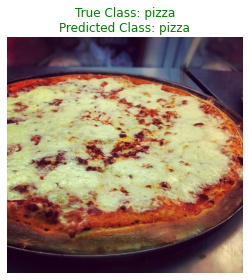

In [215]:
pred = predict_image("10_food_classes_10_percent/test/", "pizza", model_q2)